# MS Movie Studio Project Notebook
by Brandon Menendez

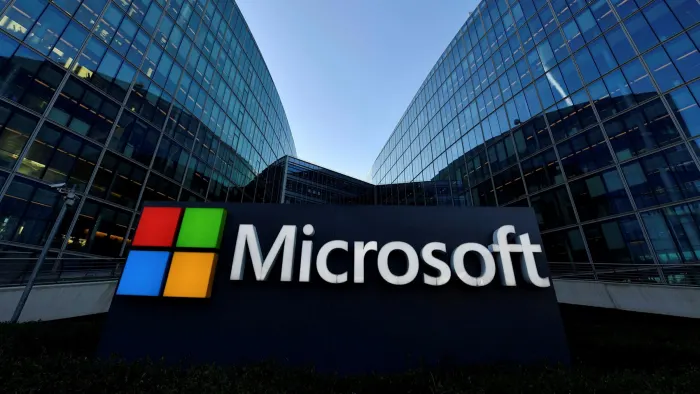

## Overview
Throughout this notebook, I will be trying to address the following prompt: 

> Use exploratory data analysis to generate three actionable insights that the new head of “Microsoft Movie Studios” can use to decide what kinds of films to create.

In order to do so, I will be analyzing data from the following data sources:

- IMDB
- TheNumbers 

## Business Objectives
In order to make recommednations for MS Movie Studios, we need to decide what success looks like. In the modern movie business, streaming is key. Over the last 5 years, we have seen most of the major movie studios distirubte their movies via streaming platforms including Universal, Paramount, 20th Century Fox and more. When it comes to being successful in streaming, movie studios need a copious amount of recognizable content. And since Microsoft is an established public company, we will assume that making profit for shareholders is important. Using this background, we are going to establish two main business objectives: 

1. Invest in projects that have low investment costs and high rates of return
2. Generate a lot of content quickly to grow streaming viewership

So let's start looking through the data and figuring out how to meet these objectives. 

## Data Understanding 

In [6]:
## Import Pandas, Matplotlib, SQLite, Seaborn, and Numpy

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
## Connect tto IMDB database

conn = sqlite3.connect('zippedData/im.db')

In [8]:
# Create IMDB tables listings for reference later 

imdb_tables = '''SELECT * FROM sqlite_master;'''

pd.read_sql_query(imdb_tables,conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


#### Storing Key IMDB Tables  to CSV files

In [9]:
movie_basics = pd.read_sql_query(''' SELECT * FROM movie_basics''',conn)
movie_basics.to_csv()
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
movie_ratings = pd.read_sql_query(''' SELECT * FROM movie_ratings ''',conn)
movie_ratings.to_csv()
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [11]:
movie_akas = pd.read_sql_query(''' SELECT * FROM movie_akas''',conn)
movie_akas.to_csv()
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [12]:
## Joing movie_ratings and movie_basics, and adding a column 'total_weight' as a measure of popularity 
## Popularity = Num. of Votes * Avg. Rating

movies_agg = pd.read_sql_query('''
SELECT 
mr.movie_id
,mb.primary_title
,mb.original_title
,mb.genres
,mb.start_year
,averagerating
,numvotes
,(averagerating*numvotes) as total_weight

FROM movie_ratings mr
LEFT JOIN movie_basics mb
ON mr.movie_id = mb.movie_id

GROUP BY 1,2,3,4,5,6,7

ORDER BY total_weight DESC;

''',conn)

movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73052 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [16]:
## Finding out the year range of data from movies_agg

print(movies_agg['start_year'].min(),movies_agg['start_year'].max())

2010 2019


#### Storing financial tables from The Numbers as CSV files

In [13]:
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
movie_gross.to_csv()
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
movie_budget = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
movie_budget.to_csv()
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [29]:
## Finding out year range of movie_gross table

print(movie_gross['year'].min(),movie_gross['year'].max())


2010 2018


### Data Preparation

#### Create columns for gross and margin calculations within movie_budget 

In [30]:
##Converting dollar amounts from objects to floats
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].map(lambda x: float(x.split('$')[1].replace(',','')))
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].map(lambda x: float(x.split('$')[1].replace(',','')))
movie_budget['production_budget'] = movie_budget['production_budget'].map(lambda x: float(x.split('$')[1].replace(',','')))

##Total margin and gross calculations
movie_budget['total_margin_$'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']
movie_budget['total_margin_%'] = (movie_budget['total_margin_$']/movie_budget['production_budget'])*100
movie_budget['domestic_margin_$'] = movie_budget['domestic_gross'] - movie_budget['production_budget']
movie_budget['domestic_margin_%'] = (movie_budget['domestic_margin_$']/movie_budget['production_budget'])*100                                                                                    

In [31]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_margin_$     5782 non-null   float64
 7   total_margin_%     5782 non-null   float64
 8   domestic_margin_$  5782 non-null   float64
 9   domestic_margin_%  5782 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 451.8+ KB


In [32]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.257713,335507625.0,78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.667286,-169536125.0,-41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-57.210757,-307237650.0,-87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.384139,128405868.0,38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,315.369636,303181382.0,95.640815


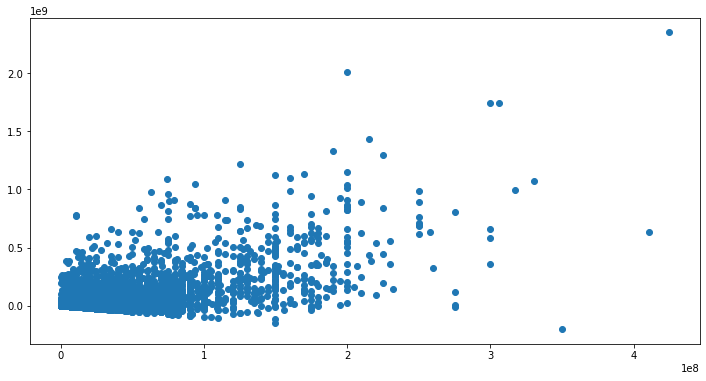

In [33]:
## What does te correlation between production budget and margin look like?

fig, ax = plt.subplots(figsize=(12,6))
x = movie_budget['production_budget']
y = movie_budget['total_margin_$']


ax.scatter(x,y);

**Observations:**
- There is not much of a correlation. Very weak positive correlation, which tells me there are better factors that affect margins besides budget

#### What does the central tendency of movie budgets look like?

In [34]:

movie_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,5.989970e+07,380.016137,1.028557e+07,198.354021
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.460889e+08,2953.028231,4.992137e+07,2608.659060
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-2.002376e+08,-100.000000,-3.072376e+08,-100.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-2.189071e+06,-50.770440,-9.132757e+06,-79.436711
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,8.550286e+06,70.830983,-3.487755e+05,-12.167378
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,6.096850e+07,275.834608,1.778144e+07,105.814816
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,179900.000000,6.306622e+08,179900.000000


In [35]:
## Need to make these numbers more readable. Converting $$ columns into millions

movie_budget['production_budget'] = movie_budget['production_budget'].map(lambda x: x/1000000)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].map(lambda x: x/1000000)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].map(lambda x: x/1000000)
movie_budget['total_margin_$'] = movie_budget['total_margin_$'].map(lambda x: x/1000000)
movie_budget['domestic_margin_$'] = movie_budget['domestic_margin_$'].map(lambda x: x/1000000)

In [36]:
movie_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000
mean,50.372363,31.587757,41.873327,91.487461,59.899704,380.016137,10.285570,198.354021
std,28.821076,41.812077,68.240597,174.719969,146.088881,2953.028231,49.921366,2608.659060
min,1.000000,0.001100,0.000000,0.000000,-200.237650,-100.000000,-307.237650,-100.000000
25%,25.000000,5.000000,1.429534,4.125415,-2.189071,-50.770440,-9.132757,-79.436711
50%,50.000000,17.000000,17.225945,27.984448,8.550286,70.830983,-0.348776,-12.167378
75%,75.000000,40.000000,52.348662,97.645837,60.968502,275.834608,17.781444,105.814816
max,100.000000,425.000000,936.662225,2776.345279,2351.345279,179900.000000,630.662225,179900.000000


array([[<AxesSubplot:title={'center':'production_budget'}>]], dtype=object)

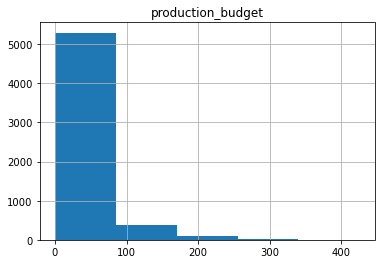

In [37]:
movie_budget.hist(column=['production_budget'],bins=5)

array([[<AxesSubplot:title={'center':'worldwide_gross'}>]], dtype=object)

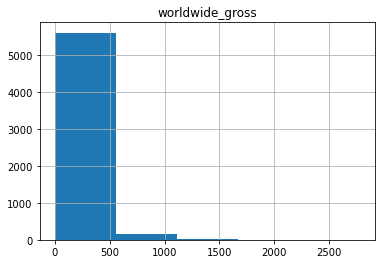

In [38]:
movie_budget.hist(column=['worldwide_gross'],bins=5,)

In [40]:
print("Median:", movie_budget['production_budget'].median(),movie_budget['worldwide_gross'].median())

Median: 17.0 27.9844485


#### Looking into genre data

In [41]:
genres = pd.DataFrame(movies_agg['genres'].value_counts())

genres.head(10)

,genres
Drama,11612
Documentary,10313
Comedy,5613
Horror,2692
"Comedy,Drama",2617
Thriller,1555
"Drama,Romance",1510
"Comedy,Romance",1236
"Comedy,Drama,Romance",1208
"Horror,Thriller",1004


In [42]:
movies_agg.isna().sum()

movie_id            0
primary_title       0
original_title      0
genres            804
start_year          0
averagerating       0
numvotes            0
total_weight        0
dtype: int64

In [43]:
# Replacing duplicates of the missing genres with "Unknown", since nulls represent ~%1 of the data.
# Won't drop them in case we need this data config later. 

movies_agg['genres'].fillna("Unkown",inplace=True)
movies_agg.isna().sum()

movie_id          0
primary_title     0
original_title    0
genres            0
start_year        0
averagerating     0
numvotes          0
total_weight      0
dtype: int64

In [44]:
# Separating genres into separate columns

movies_agg[['Genre_1','Genre_2','Genre_3']] = movies_agg['genres'].str.split(',',expand=True)
movies_agg.head(10)

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,None
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,None
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,"Biography,Crime,Drama",2013,8.2,1035358,8489935.6,Biography,Crime,Drama
6,tt1130884,Shutter Island,Shutter Island,"Mystery,Thriller",2010,8.1,1005960,8148276.0,Mystery,Thriller,None
7,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,"Action,Adventure,Comedy",2014,8.1,948394,7681991.4,Action,Adventure,Comedy
8,tt1431045,Deadpool,Deadpool,"Action,Adventure,Comedy",2016,8.0,820847,6566776.0,Action,Adventure,Comedy
9,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",2015,8.1,780910,6325371.0,Action,Adventure,Sci-Fi


In [45]:
# Filling Genre_2 and Genre_3 nulls with 'N/A since not all movies have multiple genres

movies_agg['Genre_2'].fillna('N/A',inplace=True)
movies_agg['Genre_3'].fillna('N/A',inplace=True)
movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73856 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
 8   Genre_1         73856 non-null  object 
 9   Genre_2         73856 non-null  object 
 10  Genre_3         73856 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.2+ MB


#### Combine movies_agg and movie_budgets 

In [46]:
## Cleaning titles for movie_agg for join

In [47]:
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

In [48]:
#Using original title because it joined more results than primary in draft notebook

movies_agg['clean_title'] = movies_agg['original_title'].apply(remove_punctuation)
movies_agg['clean_title'] = movies_agg['clean_title'].map(lambda x: x.lower())
movies_agg['clean_title'] = movies_agg['clean_title'].map(lambda x: x.replace(' ',''))
movies_agg.head(10)

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi,inception
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,N/A,thedarkknightrises
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi,interstellar
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,N/A,djangounchained
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi,theavengers
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,"Biography,Crime,Drama",2013,8.2,1035358,8489935.6,Biography,Crime,Drama,thewolfofwallstreet
6,tt1130884,Shutter Island,Shutter Island,"Mystery,Thriller",2010,8.1,1005960,8148276.0,Mystery,Thriller,N/A,shutterisland
7,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,"Action,Adventure,Comedy",2014,8.1,948394,7681991.4,Action,Adventure,Comedy,guardiansofthegalaxy
8,tt1431045,Deadpool,Deadpool,"Action,Adventure,Comedy",2016,8.0,820847,6566776.0,Action,Adventure,Comedy,deadpool
9,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",2015,8.1,780910,6325371.0,Action,Adventure,Sci-Fi,madmaxfuryroad


In [49]:
#Concatenating year and title in case of title dupes

movies_agg['year_title'] = movies_agg['start_year'].astype(str) + movies_agg['clean_title']

In [50]:
movies_agg.nunique()

movie_id          73856
primary_title     69993
original_title    71097
genres              924
start_year           10
averagerating        91
numvotes           7349
total_weight      22449
Genre_1              26
Genre_2              26
Genre_3              22
clean_title       70804
year_title        73413
dtype: int64

In [51]:
# Dropping duplicate values using the year_title column 

movies_agg.dropna(subset=['year_title'],inplace=True)
movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73856 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
 8   Genre_1         73856 non-null  object 
 9   Genre_2         73856 non-null  object 
 10  Genre_3         73856 non-null  object 
 11  clean_title     73856 non-null  object 
 12  year_title      73856 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 7.9+ MB


In [52]:
# Looking at best column to join movie_budget 

movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_margin_$     5782 non-null   float64
 7   total_margin_%     5782 non-null   float64
 8   domestic_margin_$  5782 non-null   float64
 9   domestic_margin_%  5782 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 451.8+ KB


In [53]:
#Cleaning Titles
movie_budget['clean_title'] = movie_budget['movie'].apply(remove_punctuation)
movie_budget['clean_title'] = movie_budget['clean_title'].map(lambda x: x.lower())
movie_budget['clean_title'] = movie_budget['clean_title'].map(lambda x: x.replace(' ',''))

In [54]:
# Making a column just for year
movie_budget['release_year'] = movie_budget['release_date'].map(lambda x: x.split(',')[1].strip() )

In [59]:
# Understand year range from movie_budget data 

print(movie_budget['release_year'].min(),movie_budget['release_year'].max())

1915 2020


In [55]:
# Concatenate year_title
movie_budget['year_title'] = movie_budget['release_year'] + movie_budget['clean_title']

In [56]:
# Create genre_budgets table 

genre_budgets = movie_budget.merge(movies_agg,how='left',left_on='clean_title',right_on='clean_title')
genre_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345 entries, 0 to 6344
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6345 non-null   int64  
 1   release_date       6345 non-null   object 
 2   movie              6345 non-null   object 
 3   production_budget  6345 non-null   float64
 4   domestic_gross     6345 non-null   float64
 5   worldwide_gross    6345 non-null   float64
 6   total_margin_$     6345 non-null   float64
 7   total_margin_%     6345 non-null   float64
 8   domestic_margin_$  6345 non-null   float64
 9   domestic_margin_%  6345 non-null   float64
 10  clean_title        6345 non-null   object 
 11  release_year       6345 non-null   object 
 12  year_title_x       6345 non-null   object 
 13  movie_id           2798 non-null   object 
 14  primary_title      2798 non-null   object 
 15  original_title     2798 non-null   object 
 16  genres             2798 

In [58]:
# Note: there are 2.8K movies from which we are assessing the normal profitability of genres
# Removing Null values that don't have any financial data 

genre_budgets.dropna(subset=['movie_id'],inplace=True)
genre_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2798 entries, 1 to 6343
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2798 non-null   int64  
 1   release_date       2798 non-null   object 
 2   movie              2798 non-null   object 
 3   production_budget  2798 non-null   float64
 4   domestic_gross     2798 non-null   float64
 5   worldwide_gross    2798 non-null   float64
 6   total_margin_$     2798 non-null   float64
 7   total_margin_%     2798 non-null   float64
 8   domestic_margin_$  2798 non-null   float64
 9   domestic_margin_%  2798 non-null   float64
 10  clean_title        2798 non-null   object 
 11  release_year       2798 non-null   object 
 12  year_title_x       2798 non-null   object 
 13  movie_id           2798 non-null   object 
 14  primary_title      2798 non-null   object 
 15  original_title     2798 non-null   object 
 16  genres             2798 

In [60]:
# Understand year range of genre budgets 

print(genre_budgets['release_year'].min(),genre_budgets['release_year'].max())

1915 2019


In [64]:
# Only looking at movies post 2000

genre_budgets = pd.DataFrame(genre_budgets[genre_budgets['release_year'].astype(int) > 2000])

### Start building genre_financials table 

In [65]:
genre_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%,start_year,averagerating,numvotes,total_weight
count,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2.525000e+03,2.525000e+03
mean,51.014653,35.246480,42.787178,105.275263,70.028784,254.877802,7.540698,66.594086,2013.850693,6.244594,7.485472e+04,5.236476e+05
std,28.460488,48.890257,73.438453,197.719358,162.089406,1115.832917,51.074041,561.104391,2.548788,1.175149,1.381540e+05,1.066575e+06
min,1.000000,0.001400,0.000000,0.000000,-200.237650,-100.000000,-307.237650,-100.000000,2010.000000,1.600000,5.000000e+00,1.400000e+01
25%,27.000000,5.000000,0.217277,1.578543,-2.240304,-72.106083,-10.520610,-94.948554,2012.000000,5.600000,3.800000e+02,1.941800e+03
50%,51.000000,17.000000,15.032800,30.163785,9.575290,58.150870,-1.137761,-32.888270,2014.000000,6.400000,1.762700e+04,1.040320e+05
75%,76.000000,40.000000,52.000688,104.949584,67.887837,253.435533,14.612460,67.019583,2016.000000,7.100000,8.758200e+04,5.664846e+05
max,100.000000,410.600000,700.059566,2048.134200,1748.134200,41556.474000,500.059566,22664.410000,2019.000000,9.300000,1.841066e+06,1.620138e+07


In [66]:
# Extra table for possible presentation visual: genre frequencies 

genre_table = pd.DataFrame(genre_budgets[['Genre_1','Genre_2','Genre_3']].apply(pd.Series.value_counts))
genre_table.fillna(0,inplace=True)
genre_table['total'] = genre_table['Genre_1'] + genre_table['Genre_2'] + genre_table['Genre_3']
genre_table

,Genre_1,Genre_2,Genre_3,total
Action,602.0,0.0,0.0,602.0
Adventure,215.0,223.0,0.0,438.0
Animation,19.0,93.0,18.0,130.0
Biography,156.0,27.0,4.0,187.0
Comedy,461.0,144.0,113.0,718.0
Crime,132.0,150.0,57.0,339.0
Documentary,128.0,26.0,9.0,163.0
Drama,547.0,522.0,185.0,1254.0
Family,12.0,60.0,60.0,132.0
Fantasy,10.0,66.0,89.0,165.0


In [67]:
## Checked central tendency grouping by genre1,2,3. Similar, so will use Genre_1 as proxy 

In [68]:
#Genre Margins
genre_margins = pd.DataFrame(pd.DataFrame(genre_budgets.groupby('Genre_1').mean())['total_margin_%'])
genre_margins.drop(index='Unkown',inplace=True)

#Genre Investments
genre_investments = pd.DataFrame(genre_budgets.groupby('Genre_1').mean()['production_budget'])
genre_investments.drop(index='Unkown',inplace=True)

#Genre Gross
genre_gross = pd.DataFrame(genre_budgets.groupby('Genre_1').mean()['worldwide_gross'])
genre_gross.drop(index='Unkown',inplace=True)

#Combining them into new table genre_financials 
genre_financials = genre_margins.merge(genre_gross,how='left',left_on='Genre_1',right_on='Genre_1')
genre_financials = genre_financials.merge(genre_investments,how='left',left_on='Genre_1',right_on='Genre_1')
genre_financials

,total_margin_%,worldwide_gross,production_budget
Genre_1,,,
Action,160.072969,189.915242,66.065831
Adventure,234.506874,233.653640,67.773865
Animation,181.447084,190.259355,47.394737
Biography,191.571424,67.636595,22.883252
Comedy,193.313174,57.522345,20.125081
Crime,134.383313,56.390047,22.008768
Documentary,141.070549,52.449262,21.017016
Drama,282.863843,48.433992,18.051907
Family,27.908967,180.321967,34.200000


In [137]:
genre_financials.describe()

,total_margin_%,worldwide_gross,production_budget
count,20.000000,20.000000,20.000000
mean,137.646407,88.552649,27.914495
std,236.398751,77.478874,18.767724
min,-100.000000,0.000000,0.500000
25%,19.137787,41.162568,16.952922
50%,131.616996,59.407234,22.446010
75%,183.978169,155.862506,36.090000
max,1027.177812,233.653640,67.773865


In [69]:
genre_financials.sort_values(by=['total_margin_%'],ascending=False,inplace=True)

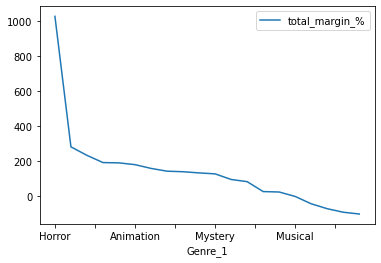

In [70]:
genre_financials.plot(y='total_margin_%');

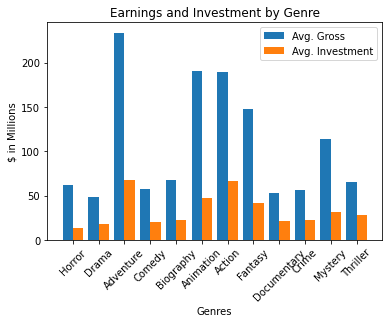

In [111]:
X = list(genre_financials.head(12).index)
Y = genre_financials.head(12)['worldwide_gross']
Z = genre_financials.head(12)['production_budget']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Avg. Gross')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Avg. Investment')

plt.xticks(X_axis, X)
plt.xticks(rotation = 45)
plt.xlabel("Genres")
plt.ylabel("$ in Millions")
plt.title("Earnings and Investment by Genre")
plt.legend()
plt.show()

### Notes so far:
1. We have a 2.5K movies from 2000 - 2019 to analyze investment and returns 
2. We have 75K movies from 2000 - 2019 from imdb with attribute and rating information
2. Movies make a lot more money if they run internationally 
3. Skip on Action/Adventure due to high investment cost

### Looking into international margins 

In [72]:
# Looking inside movie_akas, could see info about regions in the ERD from IMDB
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [73]:
# I will use this table to figure out if a movie is shown both domestically and internationally \
# check how many unique movies are in movie_akas

movie_akas.nunique()

movie_id             122302
ordering                 61
title                252781
region                  213
language                 76
types                    10
attributes               77
is_original_title         2
dtype: int64

In [74]:
# Determine how to filter for US and International
set(movie_akas['region'].unique())

{'AD',
 'AE',
 'AF',
 'AG',
 'AI',
 'AL',
 'AM',
 'AN',
 'AO',
 'AQ',
 'AR',
 'AS',
 'AT',
 'AU',
 'AW',
 'AZ',
 'BA',
 'BB',
 'BD',
 'BE',
 'BF',
 'BG',
 'BH',
 'BI',
 'BJ',
 'BM',
 'BN',
 'BO',
 'BR',
 'BS',
 'BT',
 'BUMM',
 'BY',
 'BZ',
 'CA',
 'CD',
 'CF',
 'CG',
 'CH',
 'CI',
 'CL',
 'CM',
 'CN',
 'CO',
 'CR',
 'CSHH',
 'CSXX',
 'CU',
 'CV',
 'CY',
 'CZ',
 'DE',
 'DK',
 'DM',
 'DO',
 'DZ',
 'EC',
 'EE',
 'EG',
 'EH',
 'ER',
 'ES',
 'ET',
 'FI',
 'FJ',
 'FO',
 'FR',
 'GA',
 'GB',
 'GE',
 'GH',
 'GL',
 'GM',
 'GP',
 'GR',
 'GT',
 'GU',
 'GW',
 'HK',
 'HN',
 'HR',
 'HT',
 'HU',
 'ID',
 'IE',
 'IL',
 'IM',
 'IN',
 'IQ',
 'IR',
 'IS',
 'IT',
 'JM',
 'JO',
 'JP',
 'KE',
 'KG',
 'KH',
 'KN',
 'KP',
 'KR',
 'KW',
 'KY',
 'KZ',
 'LA',
 'LB',
 'LC',
 'LI',
 'LK',
 'LR',
 'LS',
 'LT',
 'LU',
 'LV',
 'LY',
 'MA',
 'MC',
 'MD',
 'ME',
 'MG',
 'MH',
 'MK',
 'ML',
 'MM',
 'MN',
 'MO',
 'MQ',
 'MR',
 'MT',
 'MU',
 'MV',
 'MW',
 'MX',
 'MY',
 'MZ',
 'NC',
 'NE',
 'NG',
 'NI',
 'NL',
 'NO',
 'NP',


In [75]:
# Need to join movies_agg with movie_akas (changed with CASE WHEN to indicate international) 
# Trying to isolate movies that were shown BOTH domestically and internationally 

international_movies = pd.read_sql_query('''
WITH movies AS

(

SELECT  
movie_id
, title
, CASE WHEN region = 'US' THEN 'Domestic'
       WHEN region IS NULL THEN 'Unknown'
       ELSE 'International' END AS int_status

FROM movie_akas

)

, domestic AS (

SELECT DISTINCT 
movie_id

FROM movies

WHERE 
int_status = 'Domestic'
)

, international AS (

SELECT DISTINCT 
movie_id

FROM movies

WHERE
int_status = 'International'

)

SELECT DISTINCT 
movie_id

FROM domestic

WHERE movie_id in (SELECT DISTINCT movie_id FROM international)

''',conn)

international_movies

,movie_id
0,tt0369610
1,tt0401729
2,tt1014759
3,tt10446418
4,tt1182315
...,...
10851,tt9310460
10852,tt9358044
10853,tt9562694
10854,tt9705860


In [76]:
# Creating set of unique int movie ids 

int_ids = set(international_movies['movie_id'])

In [77]:
# We found 10.8K movies that were shown both in the US and at least one region outside of the US

#### Begin mergin international_movies to movies_agg 

In [79]:
#Testing output

movies_agg['movie_id'][0] in int_ids

True

In [80]:
# Check if movie id is in movies_agg and add a new column

movies_agg['is_international'] = movies_agg['movie_id'].map(lambda x: x in int_ids)
movies_agg.head()

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,year_title,is_international
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi,inception,2010inception,True
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,N/A,thedarkknightrises,2012thedarkknightrises,True
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi,interstellar,2014interstellar,True
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,N/A,djangounchained,2012djangounchained,True
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi,theavengers,2012theavengers,True


In [81]:
int_genres = pd.DataFrame(movies_agg[movies_agg['is_international']==True])

int_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10233 entries, 0 to 73786
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          10233 non-null  object 
 1   primary_title     10233 non-null  object 
 2   original_title    10233 non-null  object 
 3   genres            10233 non-null  object 
 4   start_year        10233 non-null  int64  
 5   averagerating     10233 non-null  float64
 6   numvotes          10233 non-null  int64  
 7   total_weight      10233 non-null  float64
 8   Genre_1           10233 non-null  object 
 9   Genre_2           10233 non-null  object 
 10  Genre_3           10233 non-null  object 
 11  clean_title       10233 non-null  object 
 12  year_title        10233 non-null  object 
 13  is_international  10233 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [82]:
# Adjust total_weight to be more digestible

int_genres['total_weight_adj'] = int_genres['total_weight'].map(lambda x: x/1000)

# New table for vizualization of popular genres abroad 

int_genres_weight = pd.DataFrame(int_genres.groupby(by='genres').sum().sort_values(by='total_weight_adj',ascending=False))
int_genres_weight

,start_year,averagerating,numvotes,total_weight,is_international,total_weight_adj
genres,,,,,,
"Action,Adventure,Sci-Fi",163206,476.0,22877297,166630322.1,81,166630.3221
"Action,Adventure,Fantasy",124909,344.5,9611647,64182838.8,62,64182.8388
"Adventure,Animation,Comedy",269934,811.9,8559129,61369240.4,134,61369.2404
"Action,Adventure,Comedy",189400,486.2,7102910,51624705.5,94,51624.7055
"Comedy,Drama,Romance",567891,1705.0,6583516,44895791.2,282,44895.7912
...,...,...,...,...,...,...
"Animation,Drama,Music",2019,6.7,7,46.9,1,0.0469
"Adventure,Family,Horror",2011,4.8,9,43.2,1,0.0432
"Adventure,Documentary,Music",2016,8.0,5,40.0,1,0.0400


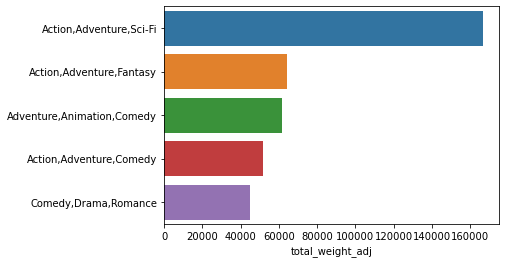

In [83]:
# Visualization of popular genres internationally

sns.barplot(x=int_genres_weight['total_weight_adj'].head(5),y=int_genres_weight.head(5).index.values,orient='h');

<AxesSubplot:xlabel='total_weight_adj', ylabel='Count'>

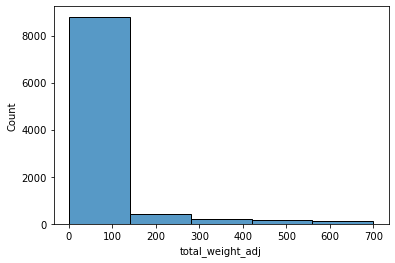

In [87]:
sns.histplot(x=int_genres['total_weight_adj'],bins=5,binrange=(0,700))

### Find a studio to acquire by isolating studio_financials table 

Objective:
- Looking for studio operating in profitable, low investment genres
- Needs to be realistic - No Universals for example 
- Should have a well known content 

In [91]:
#PART 1
### Need to isolate movie title and studio into new df CALLED studio_movies
### With new df, join  to movies_agg

#PART 2
### Using the movie_budget table, figure out economics of chosen studios 
### Economics include avg. investment cost per movie, avg. ROI 

#### Part 1: Joining movie_studios and movies_agg

In [94]:
# Create new df for join with just movies, studio, and year info 

studio_movies = pd.DataFrame(movie_gross[['title','studio','year']])
studio_movies.head()

,title,studio,year
0,Toy Story 3,BV,2010
1,Alice in Wonderland (2010),BV,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,2010
3,Inception,WB,2010
4,Shrek Forever After,P/DW,2010


In [95]:
### Need to clean titles for join. Due to years in some titles, will need to make a function to remove numbers

numbers = ['1','2','3','4','5','6','7','8','9','0']

def remove_numbers(text):
    for number in numbers:
        text = text.replace(number,'')
    return text

In [96]:
### 1) Clean titles - lowercase, no space , no punctuation, no numbers
studio_movies['clean_title_2'] = studio_movies['title'].map(lambda x: x.lower())
studio_movies['clean_title_2'] = studio_movies['clean_title_2'].map(lambda x: x.replace(' ',''))
studio_movies['clean_title_2'] = studio_movies['clean_title_2'].apply(remove_punctuation)
studio_movies['clean_title_2'] = studio_movies['clean_title_2'].apply(remove_numbers)
studio_movies.head(5)

,title,studio,year,clean_title_2
0,Toy Story 3,BV,2010,toystory
1,Alice in Wonderland (2010),BV,2010,aliceinwonderland
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,harrypotterandthedeathlyhallowspart
3,Inception,WB,2010,inception
4,Shrek Forever After,P/DW,2010,shrekforeverafter


In [97]:
#concat year and title for join 

studio_movies['year_title'] = studio_movies['year'].astype(str) + studio_movies['clean_title_2']
studio_movies

,title,studio,year,clean_title_2,year_title
0,Toy Story 3,BV,2010,toystory,2010toystory
1,Alice in Wonderland (2010),BV,2010,aliceinwonderland,2010aliceinwonderland
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,harrypotterandthedeathlyhallowspart,2010harrypotterandthedeathlyhallowspart
3,Inception,WB,2010,inception,2010inception
4,Shrek Forever After,P/DW,2010,shrekforeverafter,2010shrekforeverafter
...,...,...,...,...,...
3382,The Quake,Magn.,2018,thequake,2018thequake
3383,Edward II (2018 re-release),FM,2018,edwardiirerelease,2018edwardiirerelease
3384,El Pacto,Sony,2018,elpacto,2018elpacto
3385,The Swan,Synergetic,2018,theswan,2018theswan


In [98]:
# find the financials of each studio 
# financials include: avg ROI, avg. Gross, avg. investment 

studio_financials = studio_movies.merge(movie_budget,how='inner',left_on='year_title',right_on='year_title')
studio_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1281 entries, 0 to 1280
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1281 non-null   object 
 1   studio             1280 non-null   object 
 2   year               1281 non-null   int64  
 3   clean_title_2      1281 non-null   object 
 4   year_title         1281 non-null   object 
 5   id                 1281 non-null   int64  
 6   release_date       1281 non-null   object 
 7   movie              1281 non-null   object 
 8   production_budget  1281 non-null   float64
 9   domestic_gross     1281 non-null   float64
 10  worldwide_gross    1281 non-null   float64
 11  total_margin_$     1281 non-null   float64
 12  total_margin_%     1281 non-null   float64
 13  domestic_margin_$  1281 non-null   float64
 14  domestic_margin_%  1281 non-null   float64
 15  clean_title        1281 non-null   object 
 16  release_year       1281 

In [99]:
studio_financials.nunique()

title                1281
studio                 99
year                    9
clean_title_2        1279
year_title           1280
id                    100
release_date          535
movie                1279
production_budget     229
domestic_gross       1275
worldwide_gross      1280
total_margin_$       1280
total_margin_%       1280
domestic_margin_$    1280
domestic_margin_%    1275
clean_title          1279
release_year            9
dtype: int64

In [100]:
studio_financials.describe()

,year,id,production_budget,domestic_gross,worldwide_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,2013.607338,51.098361,46.791274,58.062719,144.472576,97.681302,316.431323,11.271445,107.882615
std,2.550351,28.222326,55.253240,81.215125,224.231897,184.315576,1309.661671,58.116580,717.448800
min,2010.000000,1.000000,0.027000,0.000000,0.001242,-110.450242,-99.986200,-201.941321,-100.000000
25%,2011.000000,27.000000,10.000000,7.204138,17.769299,1.495262,12.827729,-11.979335,-57.171540
50%,2014.000000,51.000000,26.000000,32.000304,62.108587,29.964656,134.597167,0.049285,0.303086
75%,2016.000000,75.000000,60.000000,70.525195,163.527824,109.160597,321.409297,24.469946,107.608814
max,2018.000000,100.000000,410.600000,700.059566,2048.134200,1748.134200,41556.474000,500.059566,22664.410000


In [107]:
### Based on histoplots below, I will use median as central tendency for production budget 

<AxesSubplot:xlabel='production_budget', ylabel='Count'>

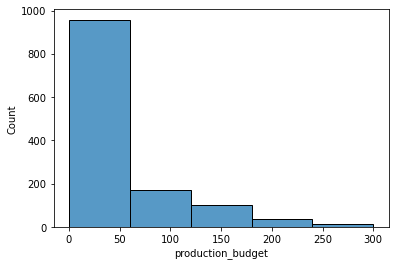

In [101]:
sns.histplot(x=studio_financials['production_budget'],bins=5,binrange=(0,300))

<AxesSubplot:xlabel='production_budget', ylabel='Count'>

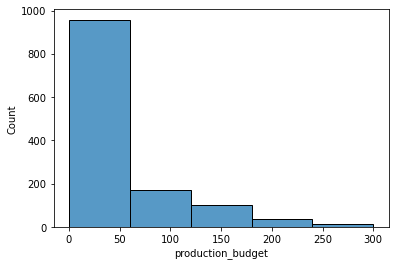

In [102]:
sns.histplot(x=studio_financials['production_budget'],bins=5,binrange=(0,300))

<AxesSubplot:xlabel='worldwide_gross', ylabel='Count'>

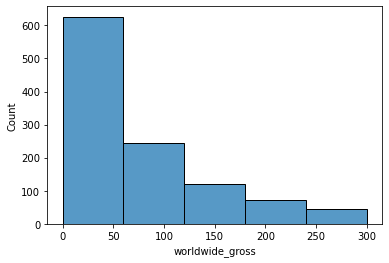

In [103]:
sns.histplot(x=studio_financials['worldwide_gross'],bins=5,binrange=(0,300))

In [139]:
studio_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1281 entries, 0 to 1280
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1281 non-null   object 
 1   studio             1280 non-null   object 
 2   year               1281 non-null   int64  
 3   clean_title_2      1281 non-null   object 
 4   year_title         1281 non-null   object 
 5   id                 1281 non-null   int64  
 6   release_date       1281 non-null   object 
 7   movie              1281 non-null   object 
 8   production_budget  1281 non-null   float64
 9   domestic_gross     1281 non-null   float64
 10  worldwide_gross    1281 non-null   float64
 11  total_margin_$     1281 non-null   float64
 12  total_margin_%     1281 non-null   float64
 13  domestic_margin_$  1281 non-null   float64
 14  domestic_margin_%  1281 non-null   float64
 15  clean_title        1281 non-null   object 
 16  release_year       1281 

In [141]:
studio_financials.groupby(by='studio').mean().sort_values(by='total_margin_%',ascending=False).head(30)

,year,id,production_budget,domestic_gross,worldwide_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
studio,,,,,,,,,
WB (NL),2014.512821,52.230769,56.425641,89.215436,221.741481,165.315840,1572.475512,32.789795,757.039556
UTV,2012.750000,30.250000,6.500000,3.854683,85.796694,79.296694,1012.637938,-2.645317,-49.223880
Orch.,2016.000000,25.000000,2.500000,5.205471,23.845533,21.345533,853.821320,2.705471,108.218840
FD,2011.818182,33.909091,29.113636,28.828577,51.814634,22.700998,690.290900,-0.285059,342.303931
BH Tilt,2016.600000,57.200000,2.800000,8.717903,13.237724,10.437724,689.651002,5.917903,373.995219
ParV,2011.500000,69.500000,5.125000,3.832409,4.218263,-0.906736,669.220635,-1.292591,600.425330
Uni.,2013.991736,53.231405,54.253719,82.359754,205.504721,151.251002,562.677765,28.106035,238.673016
TriS,2013.473684,71.210526,26.515789,49.014381,90.620288,64.104499,491.525967,22.498592,348.591645
MBox,2014.000000,3.000000,2.600000,3.827060,15.298355,12.698355,488.398269,1.227060,47.194615


In [138]:
## Looking at above we SGem has production budgets per movie, that are just around the mean. They have
## above average returns and seem to have a good international presence. See below for list of movies from SGem

## Recommendations based on above Analysis

1. Since we are looking to produce movies that have lower investment costs and higher margins, we need to focus on the following: 
    - Horror/Thriller
    - Family
    - Biography
    - Drama 
    - Documentary
    - Comedy 


2. Since we noticed international margins are often significantly higher than domestic, penetrating that market will be essential. However, due to Action and Adventure being the most popular genres for movies abroad and not wanting to invest that much money per movie, I recommend we partner with internaitonal studios in order to produce and/or distribute popular Action/Adv movies overseas at a lower cost.


3. In order to get a lot of content quickly, a good route would be to acquire an existing studio. Looking at the studio financials, SGem is a great target due to lower than average investment costs per move and higher than average returns. They are also succesful internaitonally, which will further help us in that market. They havea number of popular titles as well.

# Data Visualizations &  Analysis

### Domestic v. International Fiannces per year
Need to show how important the international market really is. 

In [112]:
#Convert release_year to ints

movie_budget['release_year'] = movie_budget['release_year'].map(lambda x: int(x))
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_margin_$     5782 non-null   float64
 7   total_margin_%     5782 non-null   float64
 8   domestic_margin_$  5782 non-null   float64
 9   domestic_margin_%  5782 non-null   float64
 10  clean_title        5782 non-null   object 
 11  release_year       5782 non-null   int64  
 12  year_title         5782 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 587.4+ KB


In [113]:
# Reducing to 2010+ for visual, since we want to show the audience more modern movie economics

int_financials = pd.DataFrame(movie_budget[movie_budget['release_year']>=2010])
int_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 1 to 5780
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2194 non-null   int64  
 1   release_date       2194 non-null   object 
 2   movie              2194 non-null   object 
 3   production_budget  2194 non-null   float64
 4   domestic_gross     2194 non-null   float64
 5   worldwide_gross    2194 non-null   float64
 6   total_margin_$     2194 non-null   float64
 7   total_margin_%     2194 non-null   float64
 8   domestic_margin_$  2194 non-null   float64
 9   domestic_margin_%  2194 non-null   float64
 10  clean_title        2194 non-null   object 
 11  release_year       2194 non-null   int64  
 12  year_title         2194 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 240.0+ KB


In [114]:
# Creating int_financials table 
int_financials = pd.DataFrame(int_financials.groupby(by=['release_year']).mean())

In [117]:
# Create column for international margins, not explicity done before

int_financials['int_margin_$'] = int_financials['worldwide_gross'] - int_financials['domestic_gross'] - int_financials['production_budget']

# Reducing to just needed columns for visualization
int_financials = pd.DataFrame(int_financials[['domestic_margin_$','production_budget','int_margin_$']])

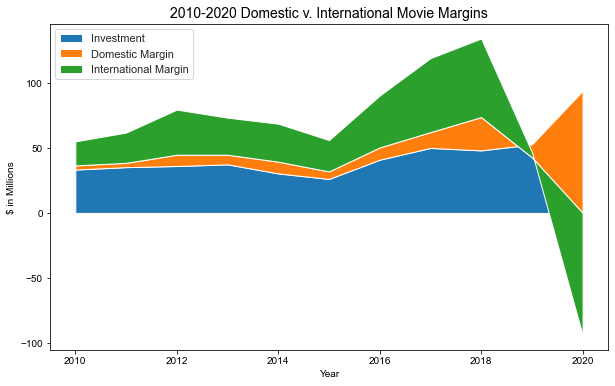

In [118]:
fig, ax = plt.subplots(figsize=(10,6))

#Create Data
x = int_financials.index.values
y1 =  [x for x in int_financials['production_budget']]
y2 =  [x for x in int_financials['domestic_margin_$']]
y3 =  [x for x in int_financials['int_margin_$']]

y = [y1,y2,y3]

#Style

sns.set_theme(style='white')


#Plot
plt.stackplot(x,y, labels=['Investment','Domestic Margin','International Margin'])
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('$ in Millions')
plt.title('2010-2020 Domestic v. International Movie Margins',fontsize=14)


plt.show()

### Margins v. Investment for Example Movies 
Want to show our audience how even the highest grossing films can be negative prodit domestically 

In [120]:
example_movies = pd.DataFrame(movie_budget[['movie','production_budget','worldwide_gross','domestic_gross','domestic_margin_$']].head(30))

example_movies = pd.DataFrame(example_movies.iloc[[1,8,9,14,22]])

example_movies['int_margin_$'] = example_movies['worldwide_gross'] - example_movies['domestic_gross'] - example_movies['production_budget']

In [121]:
example_movies.head()

,movie,production_budget,worldwide_gross,domestic_gross,domestic_margin_$,int_margin_$
1,Pirates of the Caribbean: On Stranger Tides,410.6,1045.663875,241.063875,-169.536125,394.000000
8,Justice League,300.0,655.945209,229.024295,-70.975705,126.920914
9,Spectre,300.0,879.620923,200.074175,-99.925825,379.546748
14,Tangled,260.0,586.477240,200.821936,-59.178064,125.655304
22,The Fate of the Furious,250.0,1234.846267,225.764765,-24.235235,759.081502


/Users/brandonmenendez/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/brandonmenendez/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


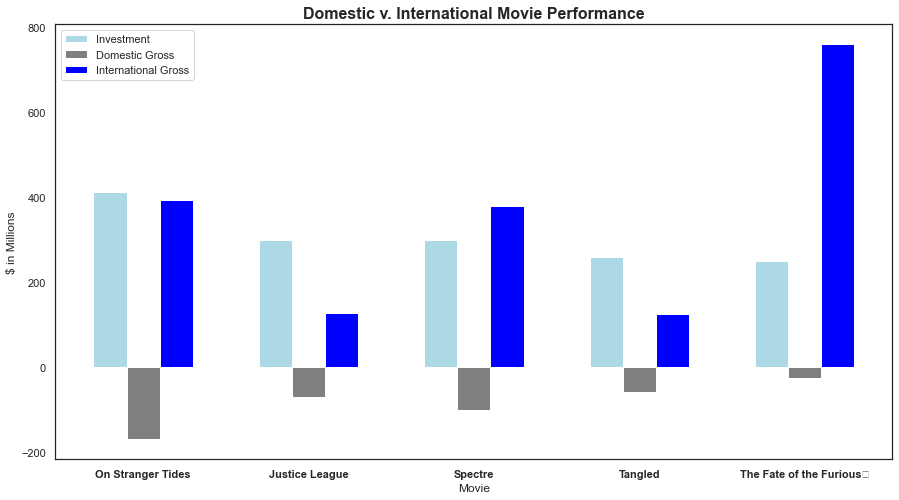

In [122]:
fig,ax = plt.subplots(figsize=(15,8))
x = example_movies['movie'].values
y1 =  [x for x in example_movies['production_budget']]
y2 =  [x for x in example_movies['domestic_margin_$']]
y3 =  [x for x in example_movies['int_margin_$']]

barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y1, color='lightblue', width=barWidth, edgecolor='white', label='Investment')
plt.bar(r2, y2, color='gray', width=barWidth, edgecolor='white', label='Domestic Gross')
plt.bar(r3, y3, color='blue', width=barWidth, edgecolor='white', label='International Gross')
 
# Add xticks on the middle of the group bars
plt.xlabel('Movie',fontsize=12)
plt.ylabel('$ in Millions',fontsize=12)
plt.title('Domestic v. International Movie Performance',fontsize=16,fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y1))],['On Stranger Tides', 'Justice League', 'Spectre', 'Tangled','The Fate of the Furious	'],fontweight='bold')
 
# Create legend & Show graphic

plt.legend()
plt.show()

### Making popular international genres chart from analysis more presentable 

Text(0.5, 1.0, 'Top 5 Popular Genres Internationally')

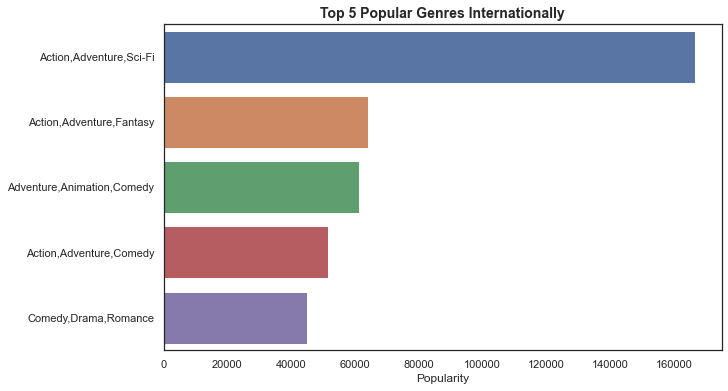

In [123]:
fig,ax = plt.subplots(figsize=(10,6))

sns.barplot(x=int_genres_weight['total_weight_adj'].head(5),y=int_genres_weight.head(5).index.values,orient='h')

plt.xlabel('Popularity')
plt.title('Top 5 Popular Genres Internationally',fontsize=14,fontweight='bold')




### Making Earnings and Investment by Genre chart more presentable

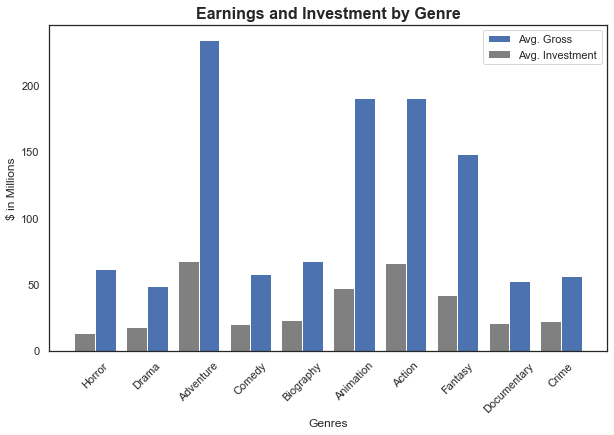

In [125]:
fig,ax=plt.subplots(figsize=(10,6))

X = list(genre_financials.head(10).index)
Y = genre_financials.head(10)['worldwide_gross']
Z = genre_financials.head(10)['production_budget']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.2, Y, 0.4, label = 'Avg. Gross')
plt.bar(X_axis - 0.2, Z, 0.4, label = 'Avg. Investment',color='gray')

plt.xticks(X_axis, X)
plt.xticks(rotation = 45)
plt.xlabel("Genres")
plt.ylabel("$ in Millions")
plt.title("Earnings and Investment by Genre",fontsize=16,fontweight='bold')
plt.legend()
plt.show()

### SGem Visualization

In [127]:
# Let's take a look at the  SGem movies 

studio_movies[studio_movies['studio'] == 'SGem']

,title,studio,year,clean_title_2,year_title
21,Resident Evil: Afterlife,SGem,2010,residentevilafterlife,2010residentevilafterlife
56,Dear John,SGem,2010,dearjohn,2010dearjohn
69,Burlesque,SGem,2010,burlesque,2010burlesque
81,Easy A,SGem,2010,easya,2010easya
83,Takers,SGem,2010,takers,2010takers
85,Legion (2010),SGem,2010,legion,2010legion
106,Death at a Funeral (2010),SGem,2010,deathatafuneral,2010deathatafuneral
144,Country Strong,SGem,2010,countrystrong,2010countrystrong
380,Friends with Benefits,SGem,2011,friendswithbenefits,2011friendswithbenefits
411,Priest,SGem,2011,priest,2011priest


In [128]:
# Let's understnading the most popular of these movies 

sgm = pd.DataFrame(studio_movies.merge(movies_agg,how='left',left_on='year_title',right_on='year_title'))
sgm.dropna(subset=['total_weight'],inplace=True)

In [129]:
sgm[sgm['studio'] == 'SGem'].sort_values(by='total_weight',ascending=False).head(5)

,title,studio,year,clean_title_2,year_title,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,is_international
84,Easy A,SGem,2010,easya,2010easya,tt1282140,Easy A,Easy A,"Comedy,Drama,Romance",2010.0,7.1,330125.0,2343887.5,Comedy,Drama,Romance,easya,True
389,Friends with Benefits,SGem,2011,friendswithbenefits,2011friendswithbenefits,tt1632708,Friends with Benefits,Friends with Benefits,"Comedy,Romance",2011.0,6.6,317338.0,2094430.8,Comedy,Romance,N/A,friendswithbenefits,True
2404,Don't Breathe,SGem,2016,dontbreathe,2016dontbreathe,tt4160708,Don't Breathe,Don't Breathe,"Crime,Horror,Thriller",2016.0,7.1,186799.0,1326272.9,Crime,Horror,Thriller,dontbreathe,True
779,The Vow,SGem,2012,thevow,2012thevow,tt1606389,The Vow,The Vow,"Drama,Romance",2012.0,6.8,173629.0,1180677.2,Drama,Romance,N/A,thevow,True
22,Resident Evil: Afterlife,SGem,2010,residentevilafterlife,2010residentevilafterlife,tt1220634,Resident Evil: Afterlife,Resident Evil: Afterlife,"Action,Adventure,Horror",2010.0,5.9,153270.0,904293.0,Action,Adventure,Horror,residentevilafterlife,True


In [130]:
# Lets see how their movies have done financially

sgm2 = sgm.merge(movie_budget,how='left',left_on='year_title',right_on='year_title')
sgm2.dropna(subset=['production_budget'],inplace=True)

In [131]:
# Redicuing table to what is needed for visual 

sgem = pd.DataFrame(sgm2[sgm2['studio'] == 'SGem'].sort_values(by='total_margin_$',ascending=False).head(5))
sgem = pd.DataFrame(sgem[['title','year','production_budget','total_margin_$','total_margin_%']])

In [132]:
sgem

,title,year,production_budget,total_margin_$,total_margin_%
18,Resident Evil: Afterlife,2010,57.5,238.374190,414.563809
426,Resident Evil: Retribution,2012,65.0,175.647629,270.227122
433,The Vow,2012,30.0,167.618160,558.727200
48,Dear John,2010,25.0,117.033509,468.134036
237,Friends with Benefits,2011,35.0,111.595891,318.845403


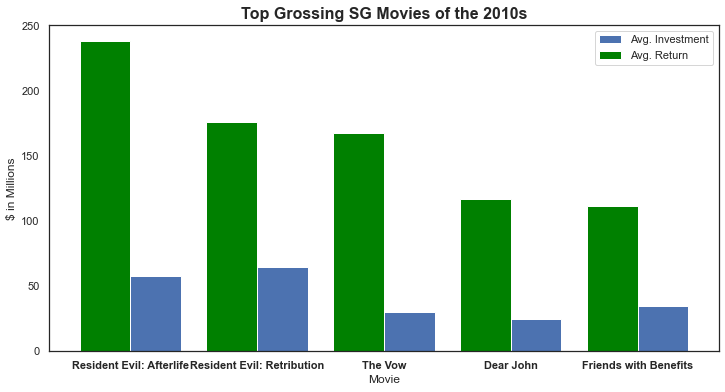

In [134]:
fig,ax=plt.subplots(figsize=(12,6))

X = list(sgem['title'].values)
Y = sgem['production_budget']
Z = sgem['total_margin_$']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.2, Y, 0.4, label = 'Avg. Investment')
plt.bar(X_axis - 0.2, Z, 0.4, label = 'Avg. Return',color='green')


plt.xticks(X_axis, X)
plt.xticks(rotation = 0,fontweight='bold')
plt.xlabel("Movie")
plt.ylabel("$ in Millions")
plt.title("Top Grossing SG Movies of the 2010s",fontsize=16,fontweight='bold')
plt.legend()
plt.show()